In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [42]:
dataset_name = 'mnist'


In [43]:
# if dataset_name == 'mnist':
# 	(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# elif dataset_name == 'cifar10':
# 	(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [66]:
#for offline dataset 

train_data = pd.read_csv('C:/Users/chris/Downloads/LP-IV-datasets/LP-IV-datasets/MNIST(Ass2&3)/mnist_train.csv')
test_data = pd.read_csv('C:/Users/chris/Downloads/LP-IV-datasets/LP-IV-datasets/MNIST(Ass2&3)/mnist_test.csv')
    
    # Extract features and labels
X_train = train_data.drop('label', axis = 1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis = 1).values
y_test = test_data['label'].values

#reshape into 28 X 28 for mnist or 32 X 32 for cifar10

X_train = X_train.reshape(-1, 28, 28,1)
X_test = X_test.reshape(-1, 28, 28,1)

In [67]:
X_train = X_train / 255.0
X_test = X_test / 255.0

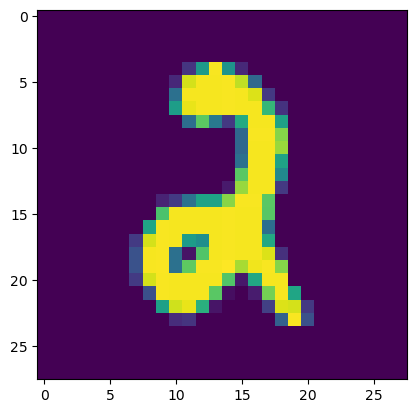

In [68]:
plt.imshow(random.choice(X_train))


In [48]:
X_train.shape,y_train.shape,X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [49]:


y_train[:10]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int64)

In [50]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

defining the network 


In [51]:
model = Sequential([
    Input(shape = (X_train.shape[1], X_train.shape[2] )),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(64 , activation = 'relu'),
    Dropout(0.2),
    Dense(10, activation = 'softmax'),
    
])

In [52]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [53]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5737 - loss: 1.3407 - val_accuracy: 0.9016 - val_loss: 0.3567
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8665 - loss: 0.4541 - val_accuracy: 0.9227 - val_loss: 0.2701
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8941 - loss: 0.3624 - val_accuracy: 0.9329 - val_loss: 0.2264
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9088 - loss: 0.3120 - val_accuracy: 0.9432 - val_loss: 0.1906
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9206 - loss: 0.2726 - val_accuracy: 0.9484 - val_loss: 0.1721
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9292 - loss: 0.2426 - val_accuracy: 0.9525 - val_loss: 0.1570
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9358 - loss: 0.2209 - val_accuracy: 0.9554 - val_loss: 0.1449
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9426 - loss: 0.2000 - 

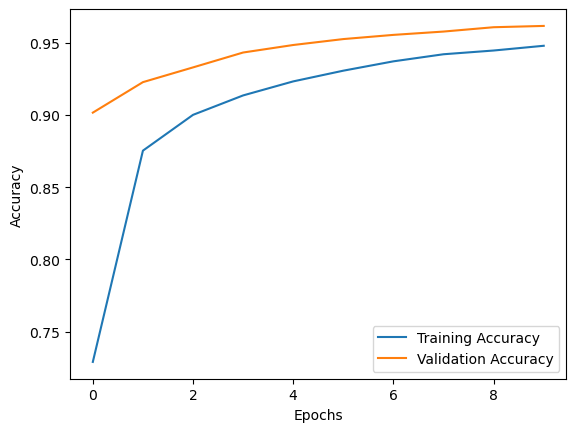

In [54]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

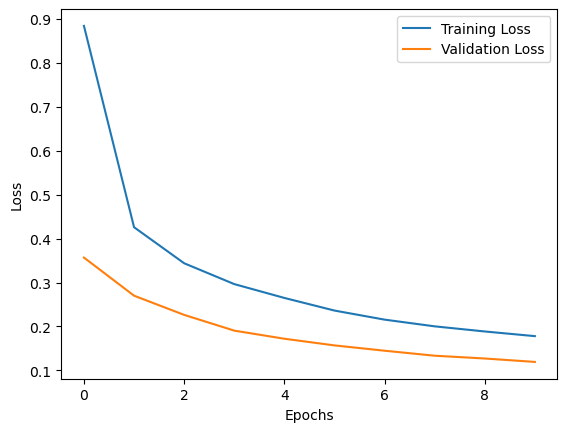

In [55]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [56]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9556 - loss: 0.1384


In [57]:
y_preds =  model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Actual label: 3
Predicted label: 3


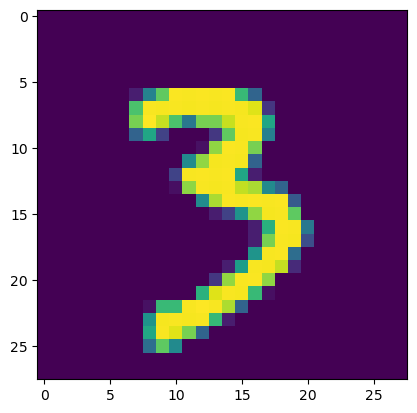

In [58]:
plt.imshow(X_test[30])
print(f'Actual label: {np.argmax(y_test[30])}')
print(f'Predicted label: {np.argmax(y_preds[30])}')
plt.show()